# **Exploratory Data Analysis**

## **1) EDA with Red Wine Dataset**

Dataset Download Link : https://github.com/nikhilpodila/Classification-UCI-Datasets/blob/master/winequality-red.csv

Based on the provided dataset information:

- The dataset contains a total of 1599 records (rows).
- There are 12 columns (features) in the dataset.
- Here's a summary of the columns and their data types:
  1. **fixed acidity**: Float64
  2. **volatile acidity**: Float64
  3. **citric acid**: Float64
  4. **residual sugar**: Float64
  5. **chlorides**: Float64
  6. **free sulfur dioxide**: Float64
  7. **total sulfur dioxide**: Float64
  8. **density**: Float64
  9. **pH**: Float64
  10. **sulphates**: Float64
  11. **alcohol**: Float64
  12. **quality**: Int64

- The dataset includes both numerical features (float64) and the target variable "quality," which is of integer type (int64).

- All columns have non-null values, indicating that there are no missing values in the dataset.

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplolib inline means matplotlib graphs will be included in your notebook, next to the code
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/wine-dataset.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#descriptive summary of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#shape of the dataset
df.shape

(1599, 12)

In [ ]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
#to count each datapoint present in unique datapoint of quality
df["quality"].value_counts() #conclusion - imbalanced dataset

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#finding is there missing value or not
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#to check duplicate records from dataset
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [ ]:
#to view all duplicates
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
#remove the duplicate records
df.drop_duplicates(inplace = True) #permenently removed

In [ ]:
df.shape

(1359, 12)

In [ ]:
#listing the correlation between the features of dataset
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

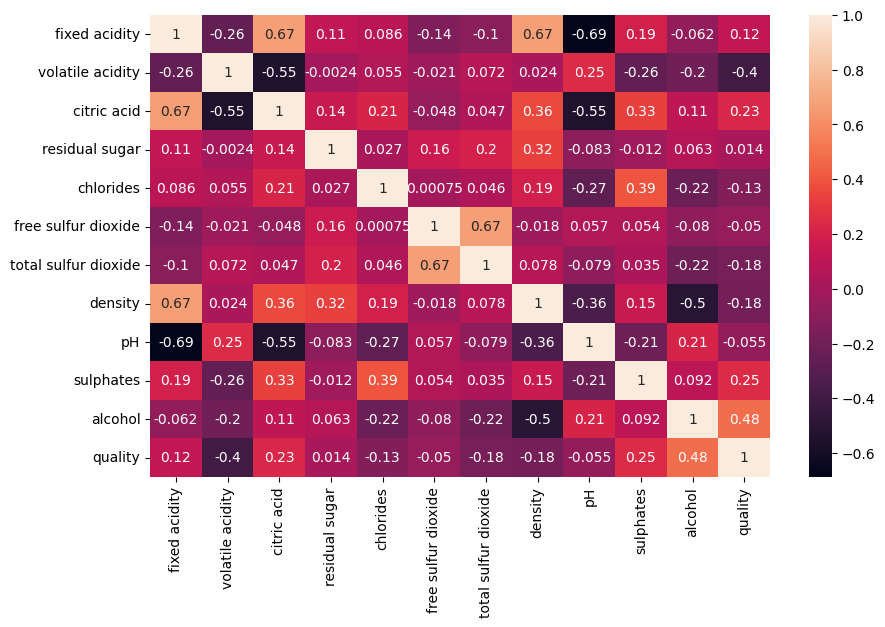

In [ ]:
#visulization way of correlation
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True) #annot - shows the values present in block

In [ ]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<Axes: >

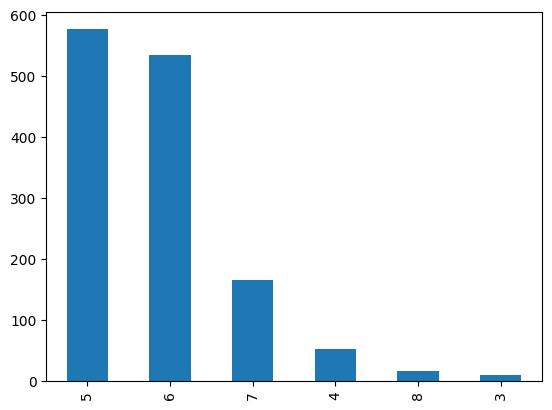

In [ ]:
#plotting the value counts
df["quality"].value_counts().plot(kind = "bar")

<Axes: xlabel='fixed acidity', ylabel='Density'>

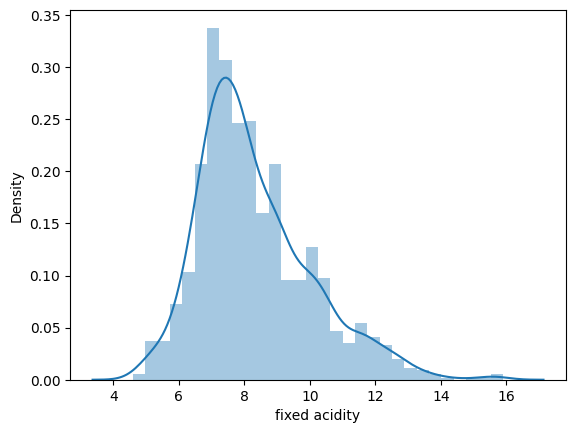

In [ ]:
sns.distplot(df["fixed acidity"])

<Axes: xlabel='fixed acidity', ylabel='Count'>

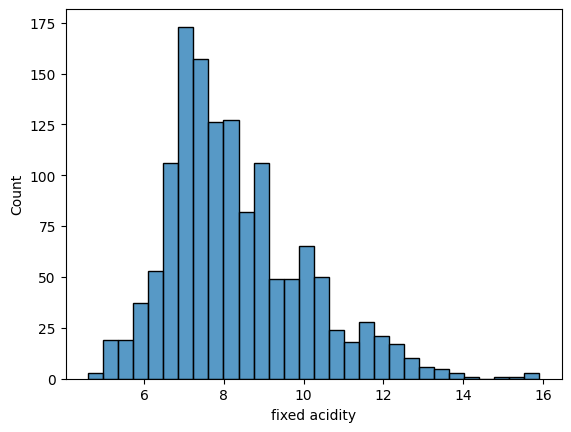

In [ ]:
sns.histplot(df["fixed acidity"])

<Axes: xlabel='fixed acidity', ylabel='Count'>

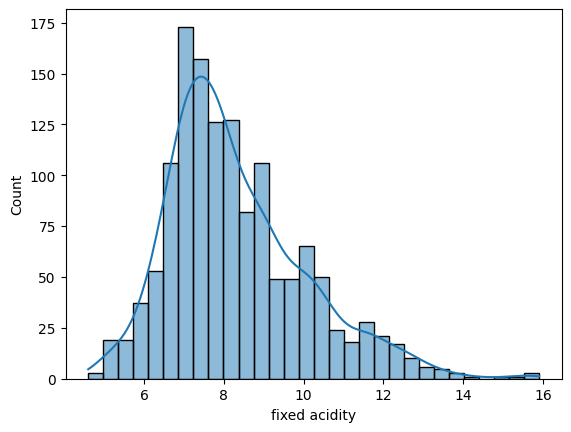

In [ ]:
#kde help to creates a smooth line curve
sns.histplot(df["fixed acidity"], kde = True)

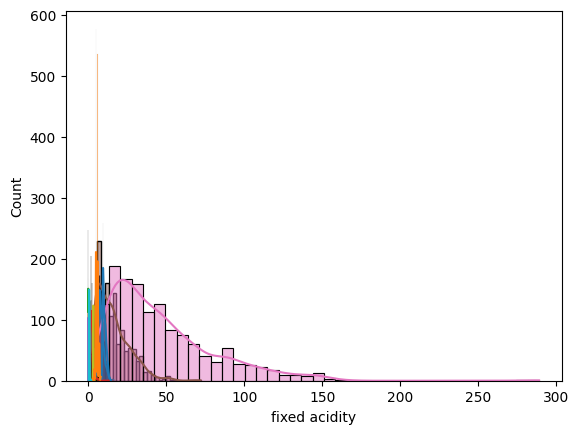

In [ ]:
#to view histogram of all the columns present in dataset
for i in df.columns:
  sns.histplot(df[i], kde = True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


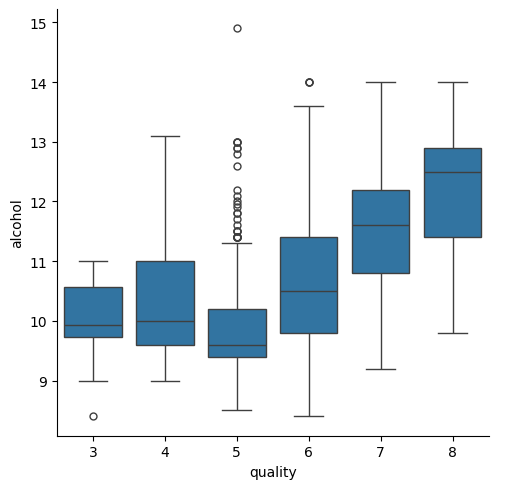

In [ ]:
#categorical plot of data
sns.catplot(x = "quality", y = "alcohol", data = df, kind = "box")

<Axes: xlabel='alcohol', ylabel='pH'>

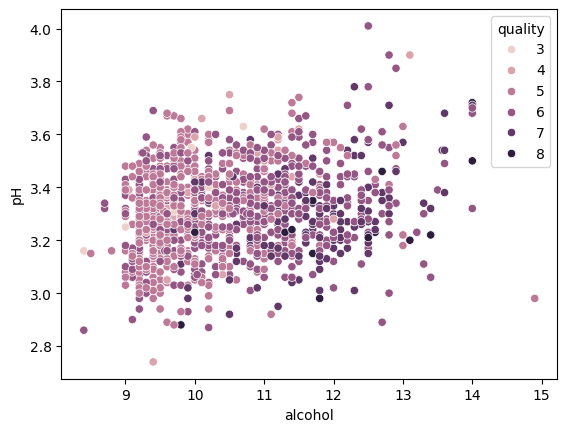

In [ ]:
#categorical data
sns.scatterplot(x = "alcohol", y = "pH", hue = "quality", data = df)

## **2) EDA with Student Performance Indicator**

Dataset Download Link : https://github.com/sharmaroshan/Students-Performance-Analytics/blob/master/StudentsPerformance.csv

Based on the provided dataset information:

- The dataset contains a total of 1000 records (rows).
- There are 8 columns (features) in the dataset.
- Here's a summary of the columns and their data types:
  1. **gender**: Gender of the student (object type).
  2. **race/ethnicity**: Race or ethnicity of the student (object type).
  3. **parental level of education**: Parental level of education (object type).
  4. **lunch**: Type of lunch received by the student (object type).
  5. **test preparation course**: Whether the student completed a test preparation course (object type).
  6. **math score**: Math score of the student (integer type).
  7. **reading score**: Reading score of the student (integer type).
  8. **writing score**: Writing score of the student (integer type).
- The dataset includes both categorical (object type) and numerical (integer type) features.
- All columns have non-null values, indicating that there are no missing values in the dataset.


In [ ]:
#read the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,high school,standard,none,77,79,80
1,male,group C,associate's degree,free/reduced,completed,86,87,83
2,male,group A,associate's degree,standard,none,61,49,50
3,male,group C,bachelor's degree,standard,none,91,82,87
4,male,group C,associate's degree,standard,completed,98,91,91


In [ ]:
df.shape

(1000, 8)

##**checking of datasets**
- check the missing values
- check the duplicates
- check data types
- check no. of unique values
- check statistics of dataset
- check variable categories present in diffrent categorical columns

In [ ]:
#check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**observation** - there is no null value present in dataset

In [ ]:
#check the duplicates
df.duplicated().sum()

0

**observation** - there are no duplicate values

In [ ]:
#check the datatypes of datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#checking the no of unique values in dataset
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     75
reading score                  69
writing score                  71
dtype: int64

In [ ]:
#check the statistics of dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,67.46400,70.470000,69.177000
std,14.30718,13.980578,14.710135
min,21.00000,27.000000,27.000000
25%,57.00000,62.000000,60.000000
50%,68.00000,71.000000,69.500000
75%,77.00000,80.000000,79.000000
max,100.00000,100.000000,100.000000


**observation**
- mean and std of all marks are nearly close to each other
- minimum marks is 21 for math and 27 for both reading and writing

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,high school,standard,none,77,79,80
1,male,group C,associate's degree,free/reduced,completed,86,87,83
2,male,group A,associate's degree,standard,none,61,49,50
3,male,group C,bachelor's degree,standard,none,91,82,87
4,male,group C,associate's degree,standard,completed,98,91,91


In [ ]:
#finding the object columns from dataset
[feature for feature in df.columns if df[feature].dtype != "O"]

['math score', 'reading score', 'writing score']

In [ ]:
#finding the numerical columns from dataset
[feature for feature in df.columns if df[feature].dtype == "O"]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [ ]:
#aggregate numerical and categorical features
numerical_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

In [ ]:
numerical_feature, categorical_feature

(['math score', 'reading score', 'writing score'],
 ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'])

In [ ]:
df["gender"].value_counts()

male      502
female    498
Name: gender, dtype: int64

In [ ]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,high school,standard,none,77,79,80
1,male,group C,associate's degree,free/reduced,completed,86,87,83


In [ ]:
#aggreagate the total score with mean
df['total_score'] = (df["math score"] + df["reading score"] + df["writing score"])
df["average"] = df["total_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group D,high school,standard,none,77,79,80,236,78.666667
1,male,group C,associate's degree,free/reduced,completed,86,87,83,256,85.333333
2,male,group A,associate's degree,standard,none,61,49,50,160,53.333333
3,male,group C,bachelor's degree,standard,none,91,82,87,260,86.666667
4,male,group C,associate's degree,standard,completed,98,91,91,280,93.333333


<Axes: xlabel='average', ylabel='Count'>

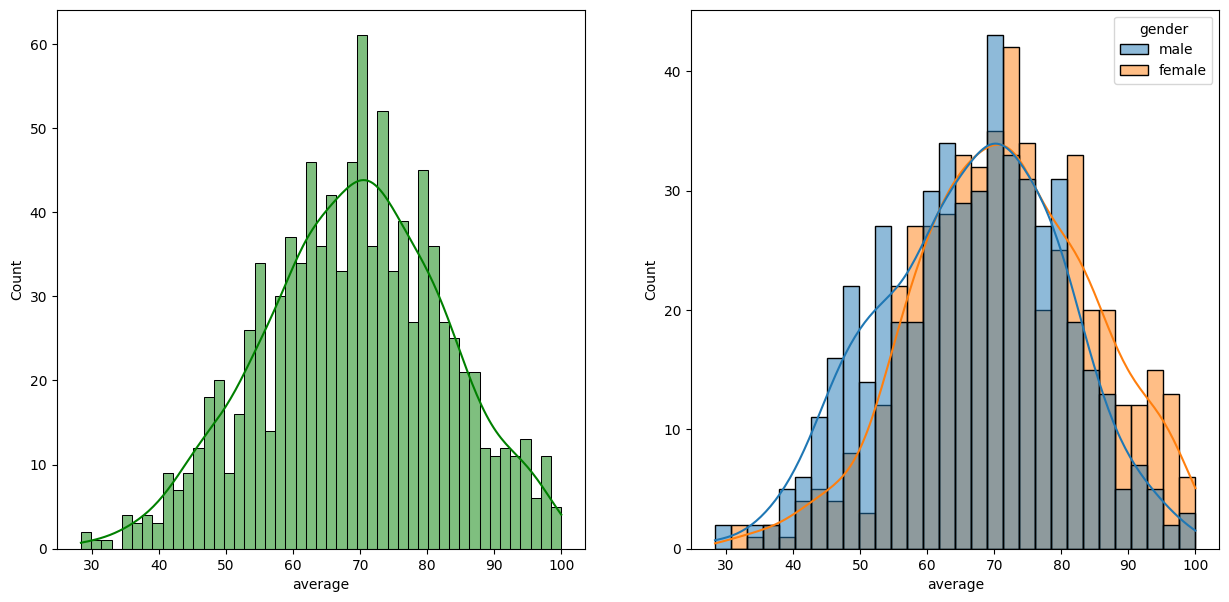

In [ ]:
#explore the more visualization
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = "average", bins = 47, kde = True, color = "g")
plt.subplot(122)
sns.histplot(data = df, x = "average", bins = 30, kde = True, hue = "gender")

**Observation** - both male and female students performs similar to the exam

<Axes: xlabel='average', ylabel='Count'>

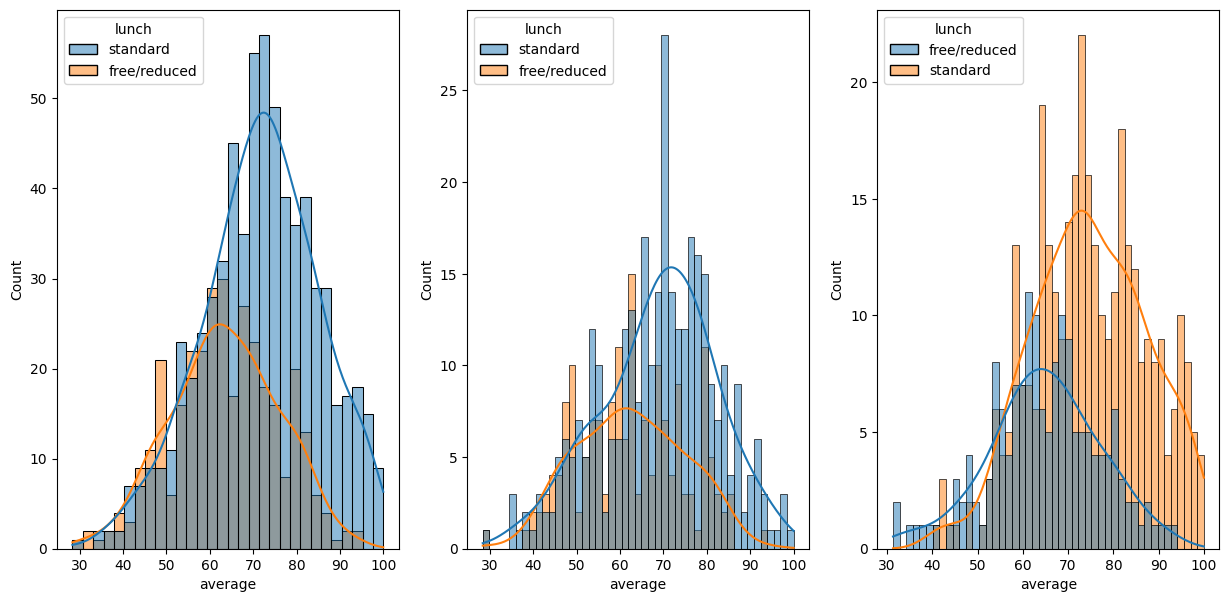

In [ ]:
#explore the more visualization
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
plt.subplot(131)
sns.histplot(data = df, x = "average", bins = 30, kde = True, hue = "lunch")
plt.subplot(132)
sns.histplot(data = df[df["gender"] == "male"], x = "average", bins = 47, kde = True, hue = "lunch")
plt.subplot(133)
sns.histplot(data = df[df["gender"] == "female"], x = "average", bins = 47, kde = True, hue = "lunch")

In [ ]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group D,high school,standard,none,77,79,80,236,78.666667


<Axes: xlabel='average', ylabel='Count'>

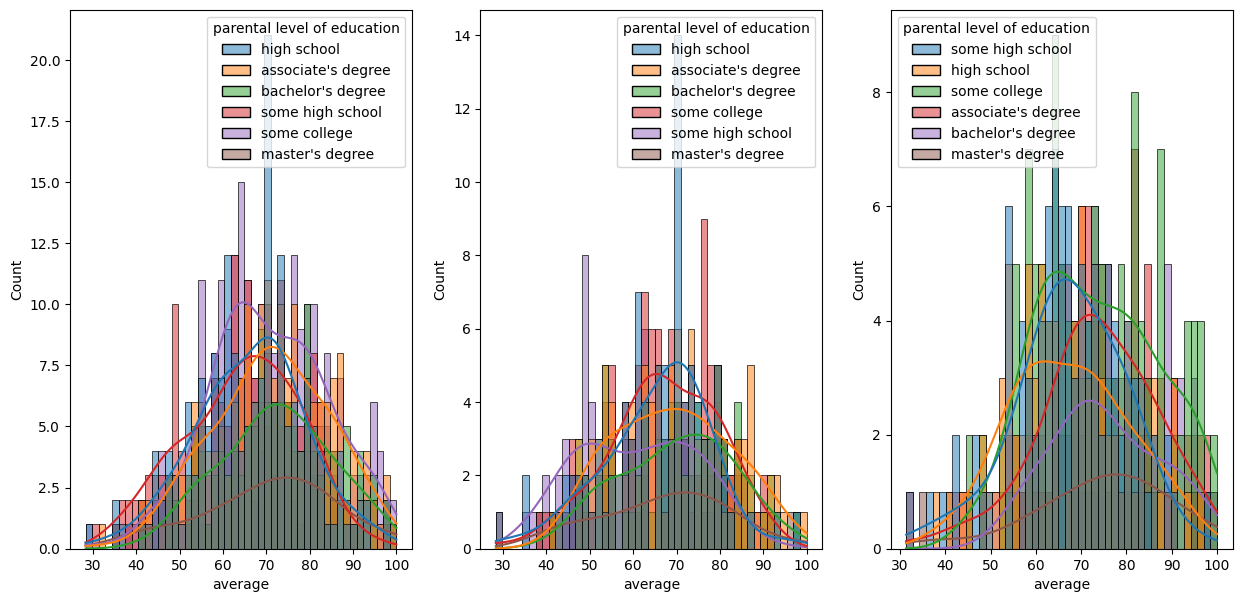

In [ ]:
#explore the more visualization
fig, axis = plt.subplots(1, 3, figsize = (15, 7))
plt.subplot(131)
sns.histplot(data = df, x = "average", bins = 47, kde = True, hue = "parental level of education")
plt.subplot(132)
sns.histplot(data = df[df["gender"] == "male"], x = "average", bins = 47, kde = True, hue = "parental level of education")
plt.subplot(133)
sns.histplot(data = df[df["gender"] == "female"], x = "average", bins = 47, kde = True, hue = "parental level of education")

<Axes: >

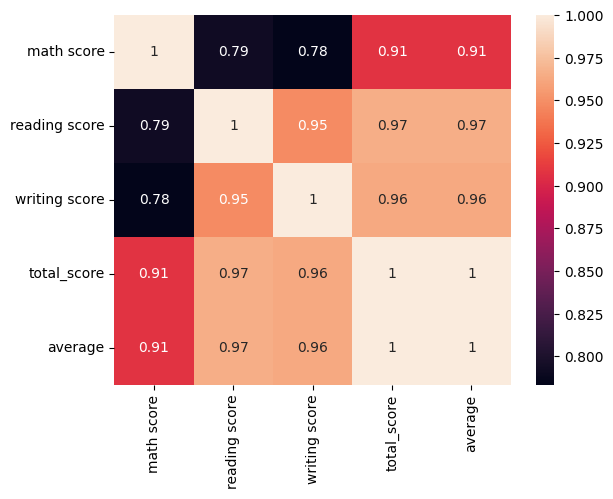

In [ ]:
#showing the correlation relation between the dataset
sns.heatmap(df.corr(), annot = True)

## **3) Algeria Forest Fire Dataset**

dataset Download link : https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset

Based on the information provided about the dataset:

- It contains a total of 246 records (rows).
- There are 14 columns (features) in the dataset.
- Here's a summary of each column:
  1. **day**: Day of the observation (object type).
  2. **month**: Month of the observation (object type). Contains 1 missing value.
  3. **year**: Year of the observation (object type). Contains 1 missing value.
  4. **Temperature**: Temperature data (object type). Contains 1 missing value.
  5. **RH**: Relative Humidity data (object type). Contains 1 missing value.
  6. **Ws**: Wind speed data (object type). Contains 1 missing value.
  7. **Rain**: Rainfall data (object type). Contains 1 missing value.
  8. **FFMC**: Fine Fuel Moisture Code data (object type). Contains 1 missing value.
  9. **DMC**: Duff Moisture Code data (object type). Contains 1 missing value.
  10. **DC**: Drought Code data (object type). Contains 1 missing value.
  11. **ISI**: Initial Spread Index data (object type). Contains 1 missing value.
  12. **BUI**: Build Up Index data (object type). Contains 1 missing value.
  13. **FWI**: Fire Weather Index data (object type). Contains 1 missing value.
  14. **Classes**: Target variable indicating fire classes (object type). Contains 2 missing values.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Algerian_forest_fires_dataset_UPDATE.csv", header = 1) #header = 1 remove header row
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.shape

(246, 14)

In [ ]:
#find the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
#descriptive summary of data
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [ ]:
df.nunique()

day             33
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            128
Classes          9
dtype: int64

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [ ]:
#finding the missing value present or not
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

<Axes: >

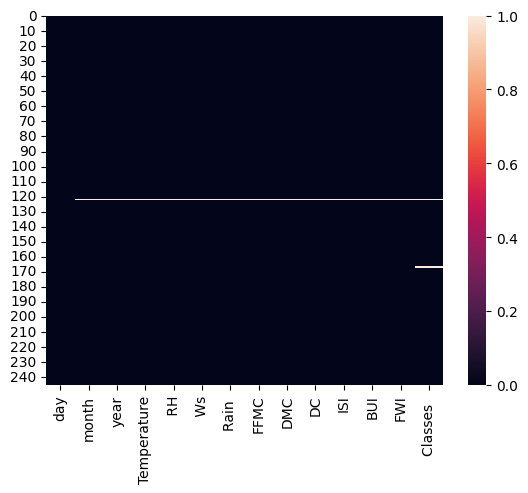

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.shape

(246, 14)

In [ ]:
#dropping the missing value as there is only two which has all columns as empty
df.dropna(inplace = True)

In [ ]:
df.shape

(244, 14)

In [ ]:
#checking the duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 244, dtype: bool

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.nunique()

day             32
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            166
DC             198
ISI            107
BUI            174
FWI            127
Classes          9
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [ ]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [ ]:
df["day"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [ ]:
count = 0
for i in df.day:
  count += 1
  if i == "day":
    print(count)

123


In [ ]:
df.day[123] = df[df["day"].notna()]["day"].mode()[0]

In [ ]:
df["day"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [ ]:
words = ['month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

for word in df[words]:
  count = 0
  for i in df[word]:
    count += 1

    if str(i).strip() == word:
      print(count)
      print(df[df[word].notna()][word].mode()[0])
      df[word][count] = df[df[word].notna()][word].mode()[0]

123
08
123
2012
123
35
123
55
123
14
123
0
123
88.9
123
7.9
123
8
123
1.1
123
3
123
0.4
123
fire   


In [ ]:
words = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

for i in words:
  print(f"{i} = {df[i].unique()}")
  print()

day = ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']

month = ['06' '07' '08' '09']

year = ['2012']

Temperature = ['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']

RH = ['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']

Ws = ['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' '10' '9'
 '8' '6' '29']

Rain = ['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']

FFMC = ['65.7' 

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
int_words = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']
float_words = ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

for i in int_words:
  df[[i]] = df[[i]].astype(int)

for i in float_words:
  df[[i]] = df[[i]].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


##**4) EDA and Feature Engineering with Flight Price Prediction Dataset**

Dataset Download Link : https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction

Based on the provided information about the dataset:

- It contains a total of 10,683 records (rows).
- The dataset consists of 11 columns (features).
- Here's a summary of each column:
  1. **Airline**: Name of the airline (object type).
  2. **Date_of_Journey**: Date of the journey (object type).
  3. **Source**: Source location of the flight (object type).
  4. **Destination**: Destination location of the flight (object type).
  5. **Route**: Route of the flight (object type). Contains 1 missing value.
  6. **Dep_Time**: Departure time of the flight (object type).
  7. **Arrival_Time**: Arrival time of the flight (object type).
  8. **Duration**: Duration of the flight (object type).
  9. **Total_Stops**: Total number of stops during the flight (object type). Contains 1 missing value.
  10. **Additional_Info**: Additional information about the flight (object type).
  11. **Price**: Ticket price of the flight (integer type).

- The dataset includes mainly categorical features (object type), except for the "Price" column, which is of integer type.

- There are missing values present in the "Route" and "Total_Stops" columns.

- The "Date_of_Journey", "Dep_Time", "Arrival_Time", and "Duration" columns are likely to require preprocessing to convert them into appropriate date/time formats and possibly numerical representations for duration.

- The "Total_Stops" column may need to be converted into a numerical format for modeling purposes.

In [ ]:
#import the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/flight-price-prediction-data.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
#now we want to convert this object columns into useful numericals, so we can upply our model

In [ ]:
#convert the date of journey into day, month and year columns
df["Date_of_Journey"].str.split("/")

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
df["date"] = df["Date_of_Journey"].str.split("/").str[0]
df["month"] = df["Date_of_Journey"].str.split("/").str[1]
df["year"] = df["Date_of_Journey"].str.split("/").str[2]

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [ ]:
#convert date, month, year columns into integer type
df["date"] = df["date"].astype(int)
df["month"] = df["month"].astype(int)
df["year"] = df["year"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  date             10683 non-null  int64 
 12  month            10683 non-null  int64 
 13  year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [ ]:
#now drop the Date_of_journey column as it's not required
df.drop("Date_of_Journey", axis = 1, inplace = True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
#now convert arrival time into arrival hours
#as arrival time is complex as it contain time with date
df["Arrival_Time"].str.split(" ").str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [ ]:
df["arrival_hours"] = df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]
df["arrival_mins"] = df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[1]

In [ ]:
#drop the unwanted column - arrival_time
df.drop("Arrival_Time", axis = 1, inplace = True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [ ]:
#convert the arrival hour and time into integer variable
df["arrival_hours"] = df["arrival_hours"].astype(int)
df["arrival_mins"] = df["arrival_mins"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   date             10683 non-null  int64 
 10  month            10683 non-null  int64 
 11  year             10683 non-null  int64 
 12  arrival_hours    10683 non-null  int64 
 13  arrival_mins     10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [ ]:
#similarly, convert the "dep_time" into hours and min.
#splitting of column
df["dept_hour"] = df["Dep_Time"].str.split(" ").str[0].str.split(":").str[0]
df["dept_min"] = df["Dep_Time"].str.split(" ").str[0].str.split(":").str[1]

#convert into integer variable
df["dept_hour"] = df["dept_hour"].astype(int)
df["dept_min"] = df["dept_min"].astype(int)

#drop the unwanted column
df.drop("Dep_Time", axis = 1, inplace = True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins,dept_hour,dept_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [ ]:
#drop the 'route' as it similar data can also be shown by source and destination
df.drop("Route", axis = 1, inplace = True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins,dept_hour,dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [ ]:
df["Duration"].str.split(" ").str[0]

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Duration, Length: 10683, dtype: object

In [ ]:
df["dur_mins"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [ ]:
df["dur_hours"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [ ]:
df.dur_hours.unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [ ]:
df.dur_mins.unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [ ]:
words = ["dur_hours", "dur_mins"]

for word in df[words]:
  count = 0
  for i in df[word]:
    count += 1

    if str(i).strip() == 'nan' or str(i).strip() == '5m':
      df[word][count] = df[df[word].notna()][word].mode()[0]

In [ ]:
df[df["dur_hours"].notna()]["dur_hours"].mode()[0]

'2'

In [ ]:
code = "5m"

code.split("m")[0]

'5'

In [ ]:
[df.dur_mins]

[0         50
 1         25
 2        NaN
 3         30
 4         45
         ... 
 10678     30
 10679     35
 10680    NaN
 10681     30
 10682     20
 Name: dur_mins, Length: 10683, dtype: object]

In [ ]:
df.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins,dept_hour,dept_min,dur_mins,dur_hours
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,25,7
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,NaN,19
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,30,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,45,4


In [ ]:
df.dur_hours[6470:6480]

6470    12
6471     2
6472    11
6473     9
6474    5m
6475     2
6476    38
6477     5
6478    26
6479     2
Name: dur_hours, dtype: object

In [ ]:
df["dur_hours"][6474]

'5m'

In [ ]:
df["dur_hours"][6474] = df["dur_hours"][6474].split("m")[0]

In [ ]:
df["dur_hours"][6474]

'5'

In [ ]:
df.shape

(10683, 16)

In [ ]:
df = df.replace('nan', np.nan)

In [ ]:
count = -1
for i in df.dur_mins:
  count += 1
  if i == "nan":
    print(count, i)

In [ ]:
df.dur_mins

0         50
1         25
2        NaN
3         30
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     30
10682     20
Name: dur_mins, Length: 10683, dtype: object

In [ ]:
df.dur_mins.isna().sum()

932

In [ ]:
df[df["dur_mins"].notna()]["dur_mins"].mode()[0]

'30'

In [ ]:
mode = df[df["dur_mins"].notna()]["dur_mins"].mode()[0]

In [ ]:
df["dur_mins"] = df["dur_mins"].fillna(mode)

In [ ]:
df.dur_mins.unique()

array(['50', '25', '30', '45', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [ ]:
#similarly, convert the "Duration" into hours and min.
#convert into integer variable
df["dur_hours"] = df["dur_hours"].astype(int)
df["dur_mins"] = df["dur_mins"].astype(int)

#drop the unwanted column
df.drop("Duration", axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   date             10683 non-null  int64 
 7   month            10683 non-null  int64 
 8   year             10683 non-null  int64 
 9   arrival_hours    10683 non-null  int64 
 10  arrival_mins     10683 non-null  int64 
 11  dept_hour        10683 non-null  int64 
 12  dept_min         10683 non-null  int64 
 13  dur_mins         10683 non-null  int64 
 14  dur_hours        10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins,dept_hour,dept_min,dur_mins,dur_hours
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,25,7
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,30,19
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,30,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,45,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   date             10683 non-null  int64 
 7   month            10683 non-null  int64 
 8   year             10683 non-null  int64 
 9   arrival_hours    10683 non-null  int64 
 10  arrival_mins     10683 non-null  int64 
 11  dept_hour        10683 non-null  int64 
 12  dept_min         10683 non-null  int64 
 13  dur_mins         10683 non-null  int64 
 14  dur_hours        10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [ ]:
mode = df[df["Total_Stops"].notna()]["Total_Stops"].mode()[0]
mode

'1 stop'

In [ ]:
df.Total_Stops.isnull().sum()

1

In [ ]:
df["Total_Stops"] = df["Total_Stops"].fillna(mode)

In [ ]:
df.Total_Stops.isnull().sum()

0

In [ ]:
df["Total_Stops"] = df["Total_Stops"].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [ ]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins,dept_hour,dept_min,dur_mins,dur_hours
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,25,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,30,19
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,30,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,45,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  int64 
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   date             10683 non-null  int64 
 7   month            10683 non-null  int64 
 8   year             10683 non-null  int64 
 9   arrival_hours    10683 non-null  int64 
 10  arrival_mins     10683 non-null  int64 
 11  dept_hour        10683 non-null  int64 
 12  dept_min         10683 non-null  int64 
 13  dur_mins         10683 non-null  int64 
 14  dur_hours        10683 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 1.2+ MB


In [ ]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#create a instance of one hot encoder
encoder = OneHotEncoder()

In [ ]:
#fit and transform the encoder at same time
encoder.fit_transform(df[["Airline", "Source", "Destination"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#create the dataframe of this OHE tranform datapoints
encoded_df = pd.DataFrame(encoder.fit_transform(df[["Airline", "Source", "Destination"]]).toarray(), columns = encoder.get_feature_names_out())
encoded_df.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins,dept_hour,dept_min,dur_mins,dur_hours
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,25,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,30,19
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,30,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,45,4


In [ ]:
#drop the airline, source and destination
df.drop(["Source", "Airline", "Destination"], axis = 1, inplace = True)

In [ ]:
df.head()

,Total_Stops,Additional_Info,Price,date,month,year,arrival_hours,arrival_mins,dept_hour,dept_min,dur_mins,dur_hours
0,0,No info,3897,24,3,2019,1,10,22,20,50,2
1,2,No info,7662,1,5,2019,13,15,5,50,25,7
2,2,No info,13882,9,6,2019,4,25,9,25,30,19
3,1,No info,6218,12,5,2019,23,30,18,5,30,5
4,1,No info,13302,1,3,2019,21,35,16,50,45,4


In [ ]:
#merge two diffrent tables
dataset = pd.concat([df, encoded_df], axis = 1)

In [ ]:
dataset.shape

(10683, 35)

In [ ]:
dataset.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'date', 'month', 'year',
       'arrival_hours', 'arrival_mins', 'dept_hour', 'dept_min', 'dur_mins',
       'dur_hours', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## **5) EDA Feature Engineering of Google Play Store Dataset**

Dataset Download Link : https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv

Based on the provided information about the dataset:

- It contains a total of 10,841 records (rows).
- The dataset consists of 13 columns (features).
- Here's a summary of each column:
  1. **App**: Name of the application (object type).
  2. **Category**: Category of the application (object type).
  3. **Rating**: Rating of the application (float64 type). Contains 9367 non-null values, indicating missing data.
  4. **Reviews**: Number of reviews for the application (object type).
  5. **Size**: Size of the application (object type).
  6. **Installs**: Number of installs for the application (object type).
  7. **Type**: Type of the application (object type). Contains 1 missing value.
  8. **Price**: Price of the application (object type).
  9. **Content Rating**: Content rating of the application (object type). Contains 1 missing value.
  10. **Genres**: Genre(s) of the application (object type).
  11. **Last Updated**: Date when the application was last updated (object type).
  12. **Current Ver**: Current version of the application (object type). Contains 8 missing values.
  13. **Android Ver**: Required Android version for the application (object type). Contains 3 missing values.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
#gives the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#gives the descriptive calculation about numerical data
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#finding the missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
df["Reviews"].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [ ]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df["Reviews"].isnull().sum()

0

**observation** - shows that review has not null values
- but, it has "3.0M" value is categorical so, we can't convert it into numerical value now

In [ ]:
df.shape

(10841, 13)

In [ ]:
#finding total number of numerical value present in "Reviews" columns
df["Reviews"].str.isnumeric().sum()

10840

In [ ]:
#find the not numerical value
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_copy = df.copy()

In [ ]:
#droping the unwanted row from table
df_copy.drop(df_copy.index[10472], inplace = True)

In [ ]:
df_copy[~df_copy["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
#now convert the "review" column into integer format
df_copy["Reviews"] = df_copy["Reviews"].astype("int")

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#we have to replace MB into KB format then into numerical
df_copy["Size"] = df_copy["Size"].str.replace("M", "000")
df_copy["Size"] = df_copy["Size"].str.replace("k", "")

In [ ]:
df_copy["Size"].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [ ]:
#replace "Varies with device" with NAN as we don't know what is its size
df_copy["Size"] = df_copy["Size"].replace("Varies with device", np.nan)

In [ ]:
#convert into int type
df_copy["Size"] = df_copy["Size"].astype("float")

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
#have to remove [, + $] from columns datapoint
char_to_remove = ["+", ",", "$"]
cols_to_remove = ["Installs", "Price"]

for item in char_to_remove:
  for cols in cols_to_remove:
    df_copy[cols] = df_copy[cols].str.replace(item, '')

In [ ]:
df_copy["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
#convert into int type
df_copy["Installs"] = df_copy["Installs"].astype("int")
df_copy["Price"] = df_copy["Price"].astype("float")

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df_copy["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [ ]:
#convert above data into datatime format
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"])
df_copy["day"] = df_copy["Last Updated"].dt.day
df_copy["month"] = df_copy["Last Updated"].dt.month
df_copy["year"] = df_copy["Last Updated"].dt.year

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  day             10840 non-null  int64         
 14  month           10840 non-null  int64         
 15  ye

In [ ]:
df_copy["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### **Performing EDA on dataset**

In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [ ]:
df_copy[df_copy.duplicated("App")].shape

(1181, 16)

the dataset has more duplicate values, so we must drop it because it will not help in calculating the model

In [ ]:
df_copy = df_copy.drop_duplicates(subset = ["App"], keep = "first")

In [ ]:
df_copy[df_copy.duplicated("App")].shape

(0, 16)

In [ ]:
#let's go ahead and explore more data
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != "O"]
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == "O"]

In [ ]:
#print columns
print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'day', 'month', 'year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


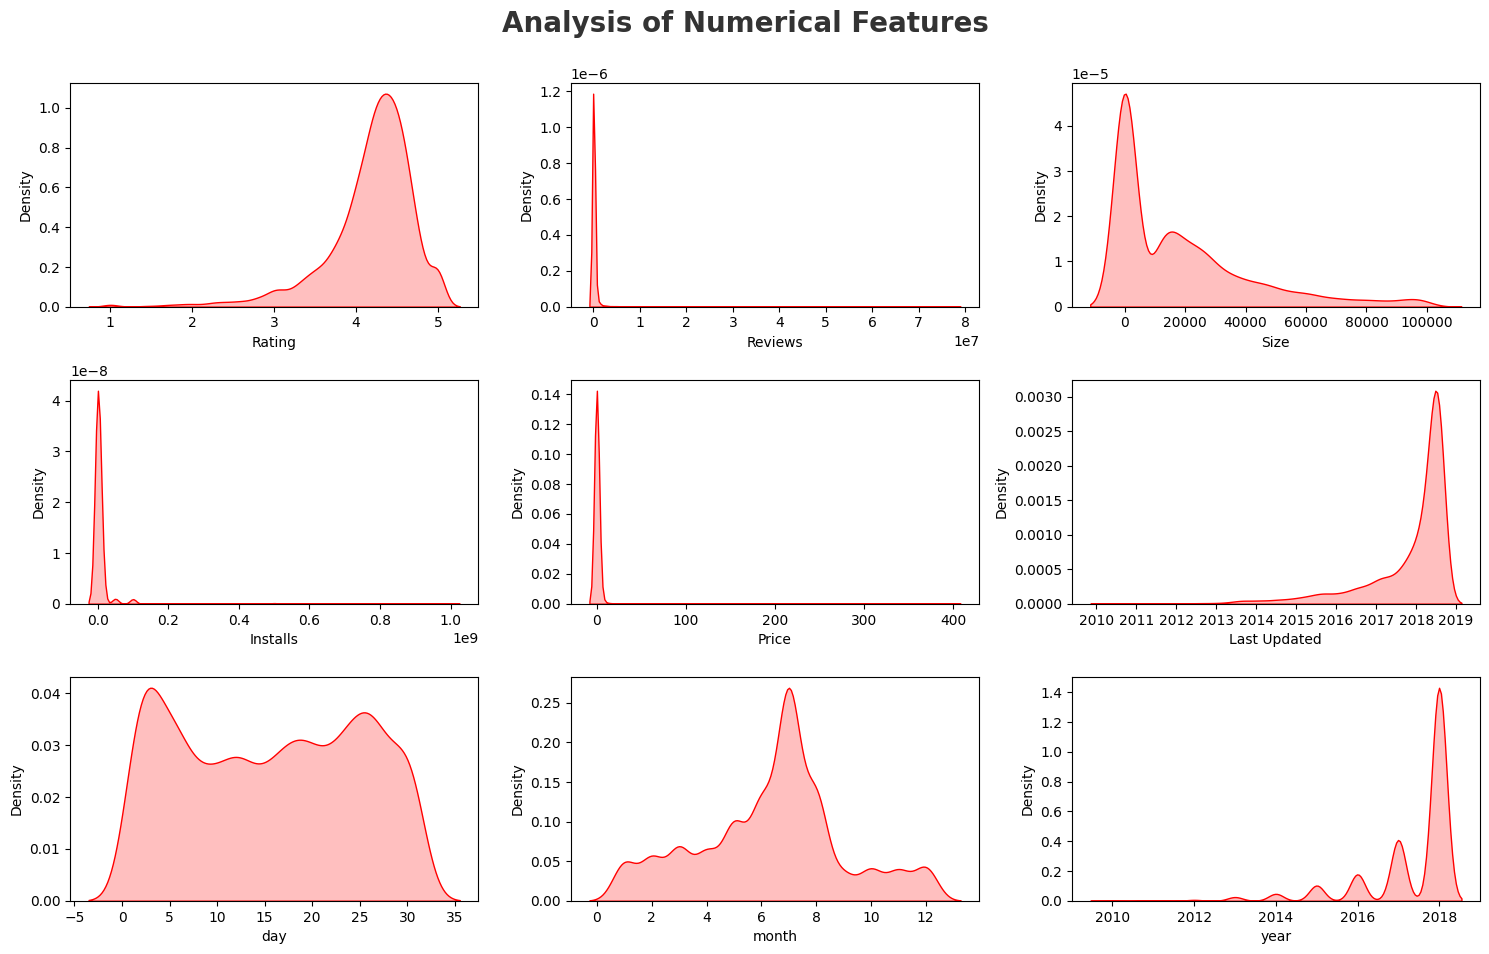

In [ ]:
#visulization of dataset
#preportion of the count data on numerical columns
plt.figure(figsize = (15, 15))
plt.suptitle("Analysis of Numerical Features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(numerical_features)):
  plt.subplot(5, 3, i+1)
  sns.kdeplot(x = df_copy[numerical_features[i]], shade = True, color = "r")
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

**observation** - Rating and year are left skewed and remaining all are right skewed

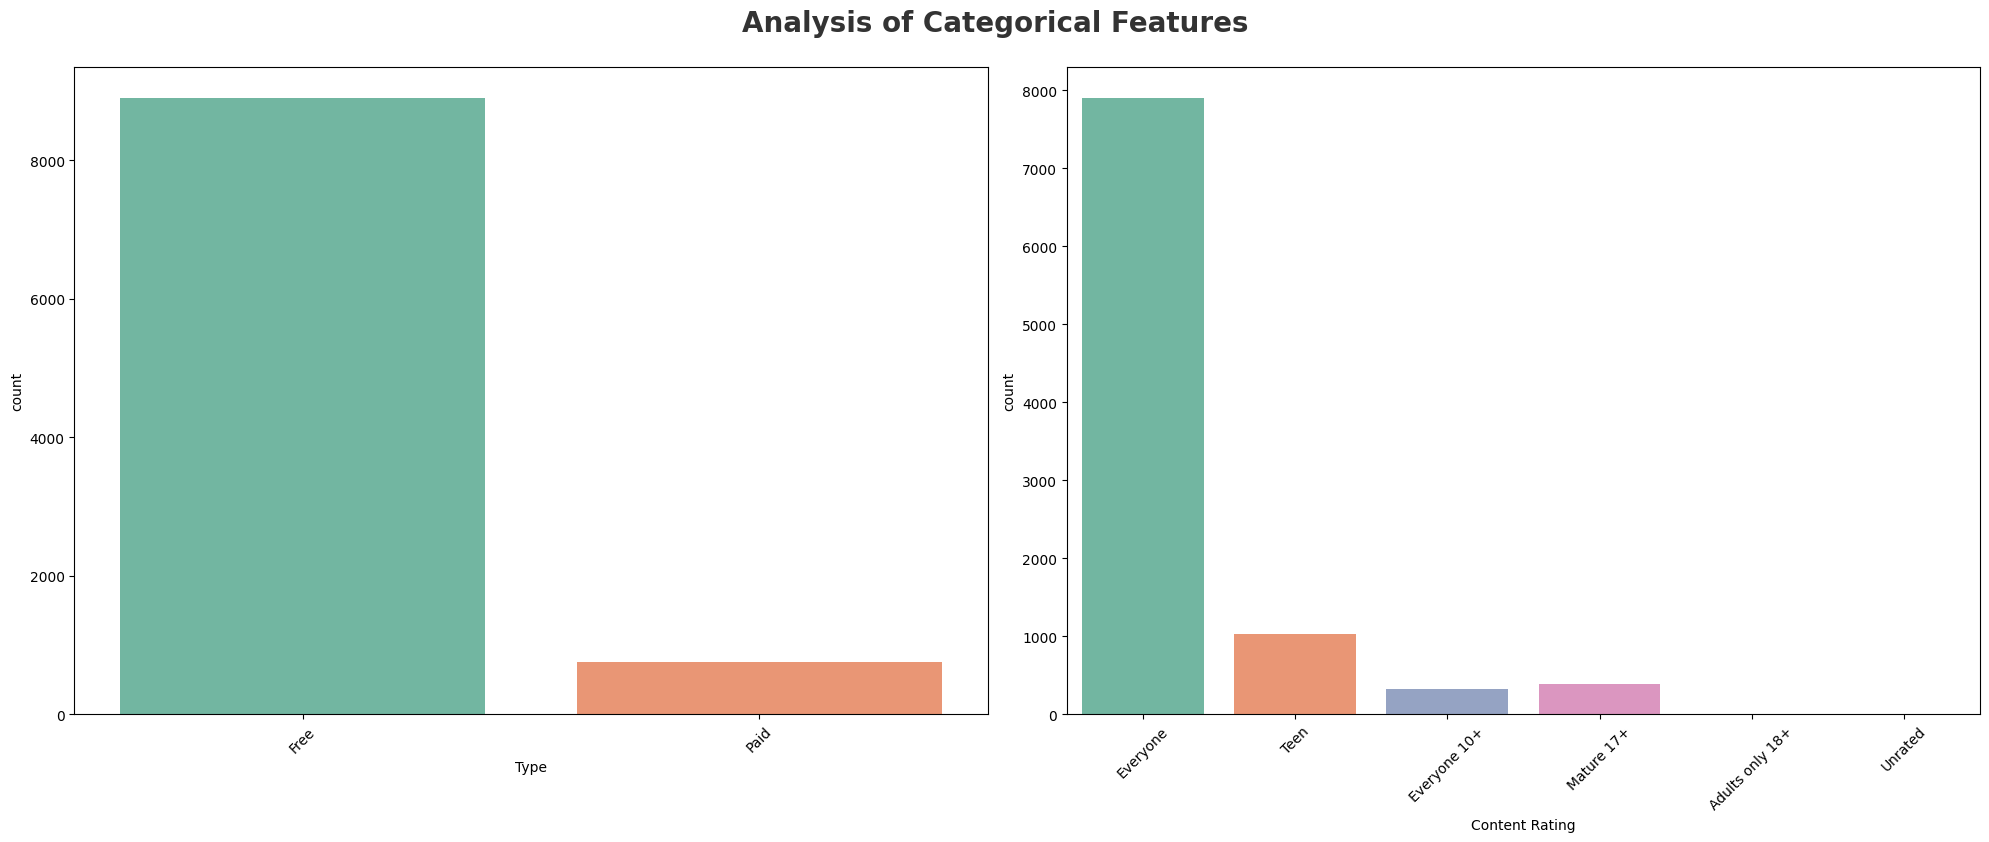

In [ ]:
#visualizing the categorical datapoints
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis of Categorical Features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)
categ = ["Type", "Content Rating"]

for i in range(0, len(categ)):
  plt.subplot(2, 2, i+1)
  sns.countplot(x = df_copy[categ[i]], palette = "Set2")
  plt.xlabel(categ[i])
  plt.xticks(rotation = 45)
  plt.tight_layout()

## **which is the most popular app category?**

In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [ ]:
df_copy["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<Axes: ylabel='Category'>

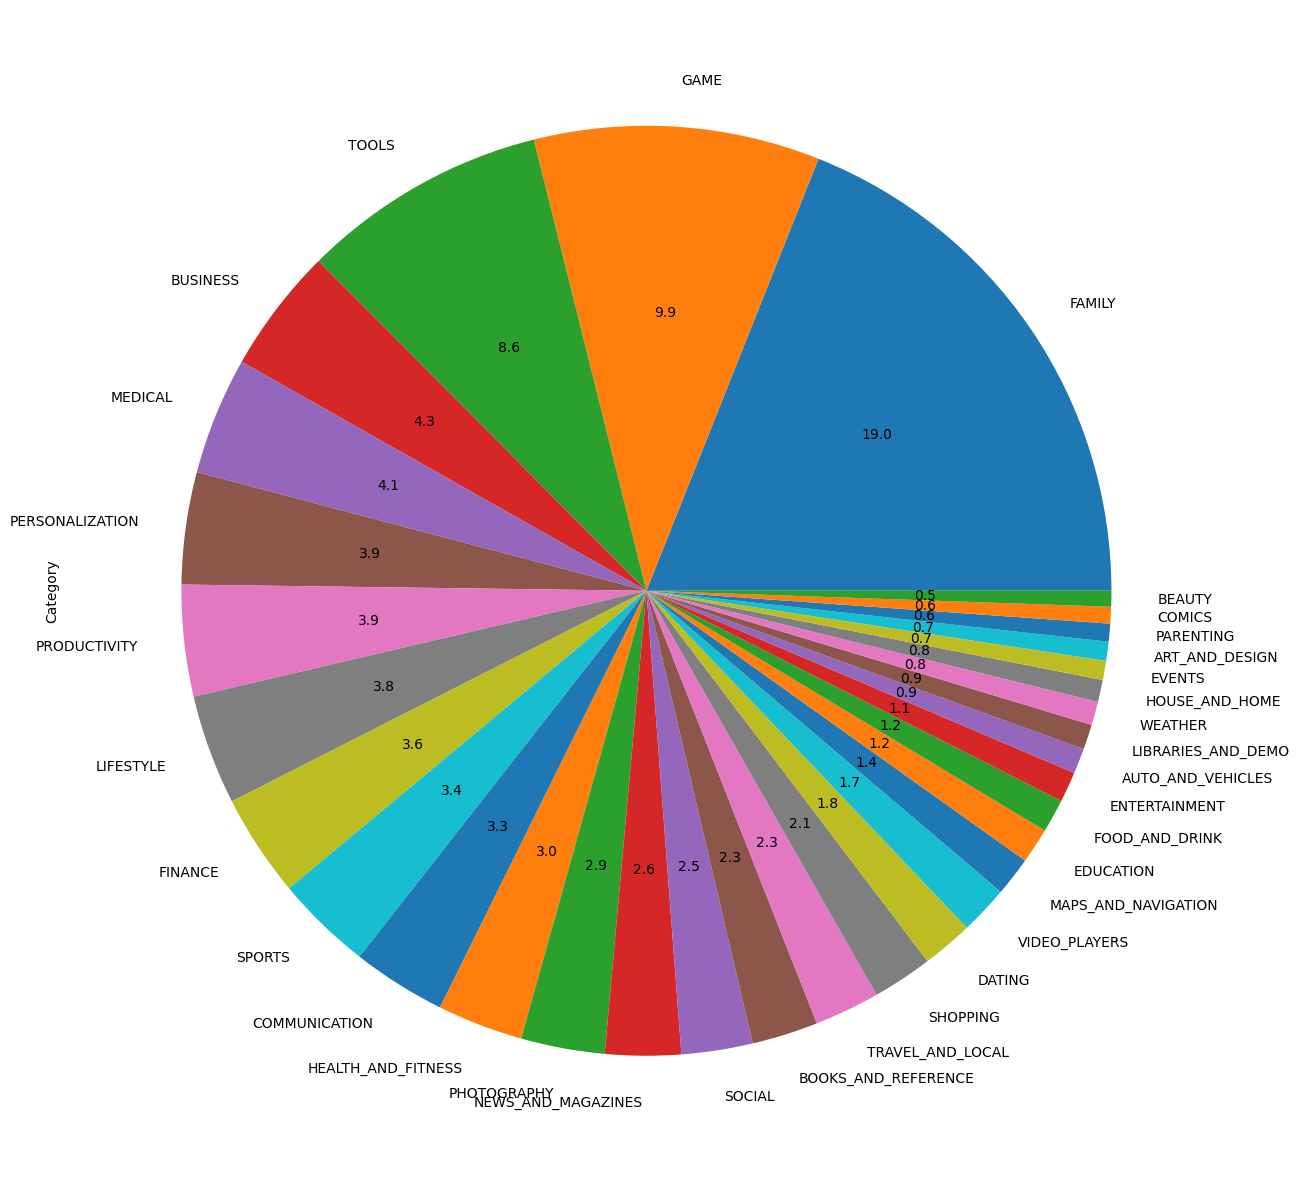

In [ ]:
df_copy["Category"].value_counts().plot.pie(y = df_copy["Category"], figsize = (15, 16), autopct = "%1.1f")

## **observation**
1) There are more kinds of apps in playstore which are under category of family, games and tools
2) Beauty, comics, art and weather kinds of apps are very less in playstore

In [ ]:
##finding the top 10 app category
category_list = pd.DataFrame(df_copy["Category"].value_counts())
category_list.rename(columns = {"Category" : "Counts"}, inplace = True)

In [ ]:
category_list

,Counts
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


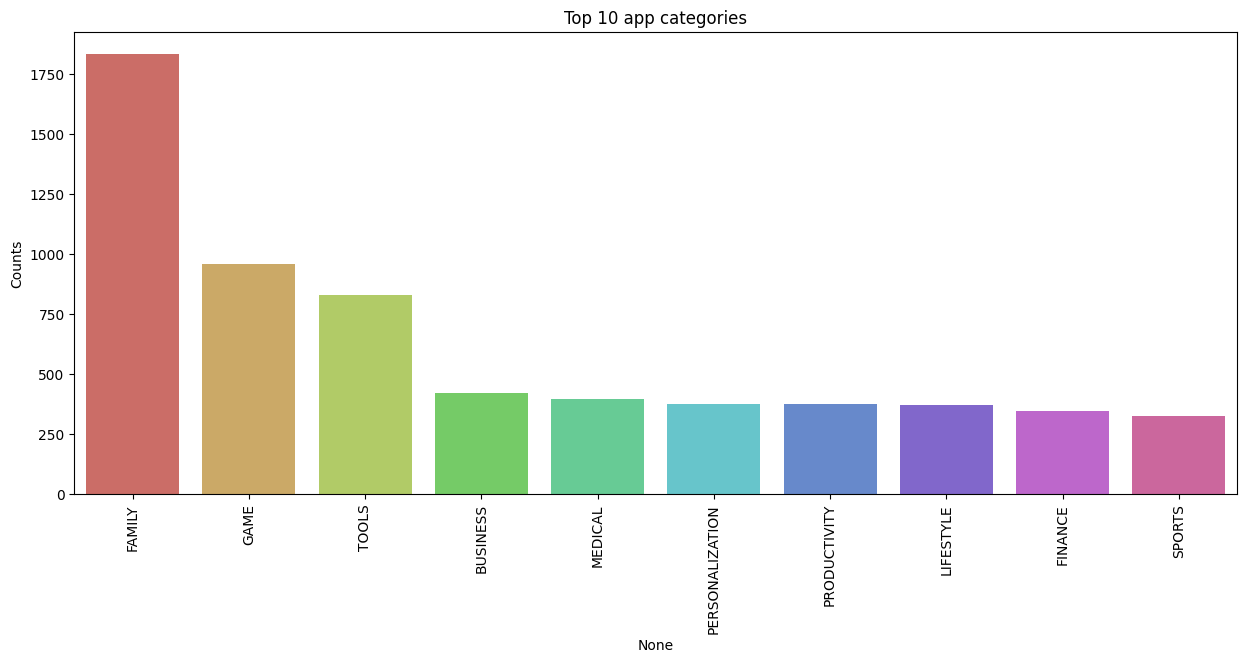

In [ ]:
#top 10 apps
plt.figure(figsize = (15, 6))
sns.barplot(x = category_list.index[:10], y = "Counts", data = category_list[:10], palette = "hls")
plt.title("Top 10 app categories")
plt.xticks(rotation = 90)
plt.show()

**observation**

1) family category has the most number of apps with 18% of apps belongs to ti, followed by games category which has 11% of the apps

2) least number of apps belong to the beauty category with less than 1% of the total apps belonging to it.

#let's find the -
1) which category has largest number of installations?

2) what are the top 5 most installed apps in each popular categories?

3) how many apps are there on google play store which get 5 ratings?

###**1) which category has largest number of installations?**

In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [ ]:
df_copy["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df_copy.groupby("Category")["Installs"].sum()

Category
ART_AND_DESIGN           114338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1665969576
BUSINESS                 697164865
COMICS                    44981150
COMMUNICATION          11038276251
DATING                   140926107
EDUCATION                352952000
ENTERTAINMENT           2113660000
EVENTS                    15973161
FAMILY                  4427941505
FINANCE                  455348734
FOOD_AND_DRINK           211798751
GAME                   13878924415
HEALTH_AND_FITNESS      1144022512
HOUSE_AND_HOME            97212461
LIBRARIES_AND_DEMO        52995910
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
MEDICAL                   38193177
NEWS_AND_MAGAZINES      2369217760
PARENTING                 31521110
PERSONALIZATION         1532494782
PHOTOGRAPHY             4649147655
PRODUCTIVITY            5793091369
SHOPPING                1400348785
SOCIAL                  5487867902
SPORTS     

In [ ]:
df_copy.groupby("Category")["Installs"].sum().idxmax(), df_copy.groupby("Category")["Installs"].sum().max()

('GAME', 13878924415)

In [ ]:
category_list[:10]

,Counts
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


**conclusion**
- we find that 'GAME' category has the highest number of 'installation' which is nearly 13878924415 and has 959 total counts of value counts

### **2) what are the top 5 most installed apps in each popular categories?**